In [ ]:
#3a   1. question: Best Search for optimal allocation of 3 stock portfolio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n = 101 #no. of random points to be taken

#generating randome samples of allocation
samples = []
w1 = np.linspace(0,1,n)
w2 = np.linspace(0,1,n)
for one in w1:
  for two in w2:
    if(one+two <=1):
      samples.append((one,two,1- one -two))

In [ ]:
len(samples)

5151

In [ ]:
#risk function

def risk(sample, covariance):
  return 0.5*np.matmul(sample.transpose(), np.matmul(covariance, sample))

#given data
Mo= 0.03
M = np.array([0.0427,0.0015,0.0285])
covariance = np.array([[0.1,0.0018, 0.0011],[0.0012,0.1044,0.0026],[0.0011,0.00026,0.1411]])


#defining return function
def preturn(sample, M):
  return np.matmul(sample.transpose(), M)


#storing valid results
risks = []
returns = []
allocation = []
for sample in samples:
  w = np.array([sample[0],sample[1],sample[2]])
  #checking constraint
  if np.matmul(w.transpose(), M) >= Mo:
    allocation.append(w)
    risks.append(risk(w,covariance))
    returns.append(preturn(w,M))





In [ ]:
#least risk entry
min(risks)

0.021239954000000002

In [ ]:
allocation[np.argmin(risks)]

array([0.51, 0.21, 0.28])

In [ ]:
returns[np.argmin(risks)]

0.030072

In [ ]:
len(allocation)

1440

In [ ]:
paretopoints = []
n = len(allocation)
for i in range(n):
  flag = 0
  for j in range(n):
    if i!=j:
      if ((risks[i] > risks[j]) and (returns[i] <= returns[j])) or ((risks[i] >= risks[j]) and (returns[i] < returns[j])):
        flag = 1
        break
  if flag == 0:
    paretopoints.append(allocation[i])

In [ ]:
len(paretopoints)

148

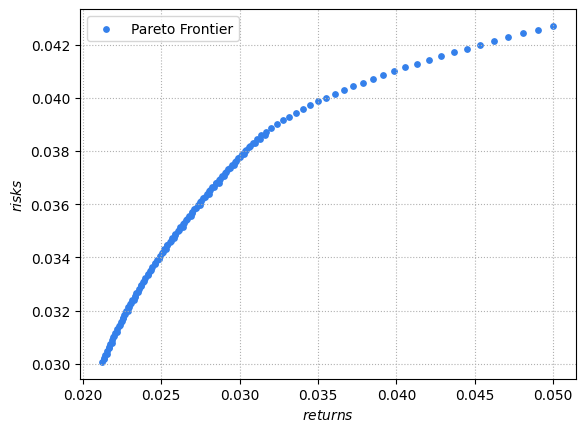

In [ ]:
returnspareto = [preturn(sample,M) for sample in paretopoints]
riskspareto = [risk(sample, covariance) for sample in paretopoints]
# pareto for return risk tradeoff

plt.scatter(riskspareto, returnspareto,color = "#3480eb", s =15)
plt.xlabel("$returns$")
plt.ylabel("$risks$")
plt.grid(linestyle = ":")
plt.legend(labels = ["Pareto Frontier"])

In [ ]:
#finding optimal allocation using ;risk avertion

lamda = [10**((v/20)-1) for v in range(1,101)]

In [ ]:
#since problem is not maximize we minimize the negative, P = lamda*covariance, q = -M

In [ ]:
!pip -q install qpsolvers[open_source_solvers]
from qpsolvers import solve_qp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.9/959.9 kB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.8/452.8 kB 41.1 MB/s eta 0:00:00


In [ ]:
results = []
for lm in lamda:
  P  = lm*covariance
  q = -M
  b=np.array([1])
  A = np.array([1, 1, 1])
  lb = np.array([0,0,0])
  res = solve_qp(P, q, G=None, h=None, A = A, b = b, lb=lb, ub=None, solver = "osqp")
  results.append(res)

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


In [ ]:
results

[array([ 1.00004232e+00, -1.90538606e-05, -2.32501202e-05]),
 array([ 1.00008123e+00, -3.66137758e-05, -4.45868278e-05]),
 array([ 1.00295778, -0.00166064, -0.00158207]),
 array([ 0.96181114, -0.00155688,  0.03946662]),
 array([ 9.20273380e-01, -6.01997596e-06,  7.97326438e-02]),
 array([ 8.83931245e-01, -1.85132004e-05,  1.16087276e-01]),
 array([ 8.51552489e-01, -4.88358744e-05,  1.48496366e-01]),
 array([ 8.22716063e-01, -1.12134726e-04,  1.77396113e-01]),
 array([ 7.97049434e-01, -2.26595533e-04,  2.03177243e-01]),
 array([ 7.74218956e-01, -4.05720508e-04,  2.26186910e-01]),
 array([7.53541389e-01, 2.00455782e-11, 2.46458612e-01]),
 array([ 7.35323517e-01, -4.70134477e-09,  2.64676489e-01]),
 array([ 0.7195128 , -0.00073082,  0.28121829]),
 array([ 7.04860707e-01, -4.20087803e-04,  2.95559537e-01]),
 array([ 0.69267072, -0.00187559,  0.30895677]),
 array([0.67641814, 0.00629502, 0.31704444]),
 array([0.64391939, 0.04449718, 0.3113506 ]),
 array([0.61495216, 0.07854449, 0.30627403])

Text(0, 0.5, '$risks$')

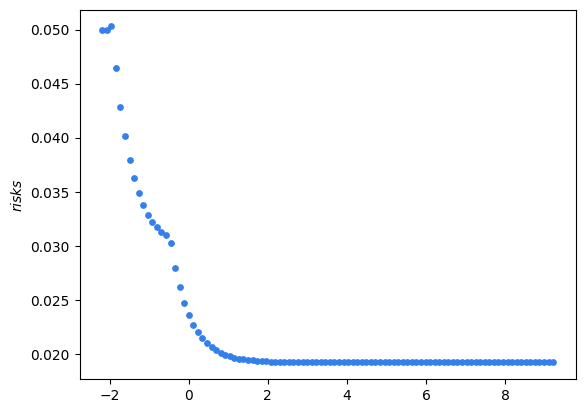

In [ ]:
returnslamda = [preturn(res,M) for res in results]
riskslamda = [risk(res, covariance) for res in results]
# pareto for return risk tradeoff

plt.scatter(np.log(lamda), riskslamda ,color = "#3480eb", s =15)
# plt.xlabel("$returns$")
plt.ylabel("$risks$")
# plt.grid(linestyle = ":")
# plt.legend(labels = ["Pareto Frontier"])

Text(0, 0.5, '$returns$')

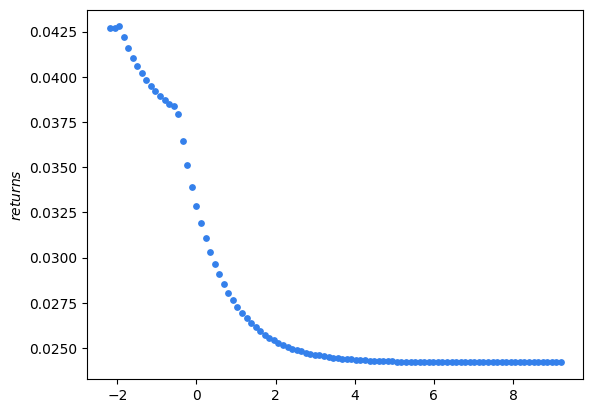

In [ ]:
plt.scatter(np.log(lamda), returnslamda ,color = "#3480eb", s =15)
plt.ylabel("$returns$")